In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [38]:
# Задание 1

In [39]:
boston = load_boston()

In [40]:
data = boston['data']

In [41]:
feature_names = boston['feature_names']

In [42]:
target = boston['target']

In [43]:
X = pd.DataFrame(data, columns=feature_names)

In [44]:
y = pd.DataFrame(target, columns=['price'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test)

In [49]:
check_test = pd.DataFrame({
    'y_test': y_test['price'],
    'y_pred': y_pred.flatten(),
})

In [50]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [51]:
r2_score(y_test, y_pred)

0.711226005748496

In [52]:
# Задание 2

In [53]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [54]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [55]:
y_pred = model.predict(X_test)

In [56]:
check_test = pd.DataFrame({
    'y_test': y_test['price'],
    'y_pred': y_pred.flatten(),
})

In [57]:
check_test.head(10)

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [58]:
r2_score(y_test, y_pred)

0.87472606157312

In [59]:
# Модель на основе класса RandomForestRegressor лучше подходит для рассматриваемых данных, поскольку её коэффициент детерминации
# выше, чем у модели на основе класса LinearRegression.

In [60]:
# Задание 3

In [61]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [62]:
model.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

<BarContainer object of 13 artists>

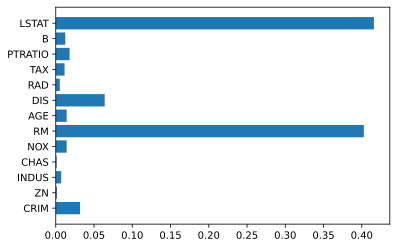

In [63]:
plt.barh(feature_names, model.feature_importances_)

<BarContainer object of 13 artists>

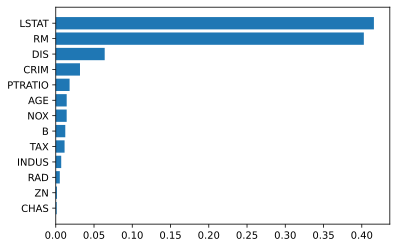

In [64]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], model.feature_importances_[sorted_idx])

In [65]:
# Признаки LSTAT (% lower status of the population), RM (average number of rooms per dwelling)
# демонстрируют наибольшую важность.